# Simulating a real-world phenomenon
***

### Table of contents

#### 1. Introduction

#### 2. Variables

#### 3. Building the data set
- 3.1 Date and day
- 3.2 Workout routine
- 3.3 Calories burned
- 3.4 Body Mass Index (BMI)
- 3.5 Total Daily Energy Expenditure (TDEE)
- 3.6 Define weight targets
- 3.7 Calorie intake
- 3.8 Calorie output
- 3.9 Weight
- 3.10 Add Body Mass Index (BMI) to the data set
- 3.11 Resting Heart Rate (RHR)
- 3.12 Fasting Blood Glucose (FBG)
- 3.13 Populating the data set

#### 4. Analysis

#### 5. Conclusion

#### 6. References

<br>

### 1. Introduction
***
Synthetic data is information that is artificially manufactured rather than generated by real-world events. This data is created algorithmically, and is used as a stand-in for test data sets of production or operational data, to validate models and to train machine learning models. It can be numerical, binary or categorical, and should preferably be random.<SUP>1</SUP> In order to simulate data from a given sample data, one needs to be able to identify patterns in the sample data as well as have some knowledge about the features and how they are distributed.<SUP>19</SUP>

The data set will make use of the ```numpy.random``` package, which is used to generate random numbers and for random sampling.<SUP>20</SUP> As I am personally interested in health and fitness, the chosen real-world phenomenon is the tracking of weight loss progress of a client over the course of one calendar year. The variables included in the data set are those that would typically be used measure a person's fitness level and/or measured when on a personal training programme. As everyone has different goals, this example specifically simulates the weight loss progress of an overweight 35-year-old male. 

The code below imports all the required libraries and applies a preferred plot style.

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Apply a plot style
plt.style.use("ggplot")

The first step is to define the height and starting weight of the client, as these will be required in a number of calculations.

In [2]:
# Define the weight and height
weight_kg, height_m = 90, 180

### 2. Variables
***
The data set will comprise the following variables:

- Date
- Day
- Weight (kg)
- Resting Heart Rate (bpm)
- Fasting Blood Glucose (mmol/l)
- Workout
- Calorie Intake
- Calorie Output
- Calorie Difference
- Total Daily Energy Expenditure
- Weight
- Body Mass Index

### 3. Building the data set
***

#### 3.1 Date and day

The ```pandas.date_range()``` function is a general function in Pandas used to return a fixed frequency DateTimeIndex.<SUP>2</SUP> As the client's stats will be recorded every day for the entire year of 2020, the start date is set to 01-01-2020, the end date is set to 31-12-2020 and the *freq* parameter is set to ```D```. To create a column with the corresponding day, the ```pandas.Series.dt.day_name()``` function returns the day names of the DateTimeIndex.<SUP>3</SUP> This column is then converted to a categorical data type from an object data type using the ```pandas.DataFrame.astype()``` as it only consists of seven repeating values.<SUP>4</SUP> <SUP>5</SUP> The ```DataFrame.head()``` function is then used to return the first 10 rows of the DataFrame.<SUP>6</SUP>

In [3]:
# Define the start and end date
date = pd.date_range("2020-01-01", "2020-12-31", freq="D")

# Create the Date and Day columns
df = pd.DataFrame({"Date": date})
df["Day"] = df["Date"].dt.day_name()

# Change the data type from object to categorical
df["Day"] = df["Day"].astype("category")

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day
0,2020-01-01,Wednesday
1,2020-01-02,Thursday
2,2020-01-03,Friday
3,2020-01-04,Saturday
4,2020-01-05,Sunday
5,2020-01-06,Monday
6,2020-01-07,Tuesday
7,2020-01-08,Wednesday
8,2020-01-09,Thursday
9,2020-01-10,Friday


Although there are slightly more Wednesdays and Thursdays in 2020, the plot below illustrates a discrete uniform distribution using the ```seaborn.countplot()``` function. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.<SUP>18</SUP>

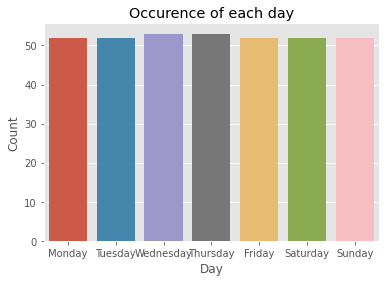

In [4]:
# Plot the occurence of each day
sns.countplot(df.Day, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Add plot title and axes labels
plt.xlabel("Day"), plt.ylabel("Count"), plt.title("Occurence of each day"), 
plt.show()

#### 3.2 Workout routine

The next step is to define the list of workouts based on the workout programme tailored to this client. The programme requires four days of strength training, 1-2 days of cardio and one rest day. While there is flexibility in terms of what day each workout occurs on, the client typically undertakes strength training from Monday to Thursday and cardio/rest from Friday to Sunday. Sunday is always taken as a rest day, but some cardio may be done on Fridays and Saturdays.

A list of the workout categories is first created. Individual variables are then created to separate the days of the week. The ```numpy.random.choice()``` function is applied to extract a random sample from the ```workouts``` list for each day of the week.<SUP>21</SUP> The probability parameter *p* is set to 50% for legs and resistance from Monday to Thursday. The client is more likely to rest on Fridays, so the probability is set to 75% for that day.

In [5]:
# Set the seed to reproduce the results
np.random.seed(5)

# Define the list of workouts in the training programme
workouts = ["Rest", "Cardio", "Legs", "Resistance"]

# Separate the days of the week into variables
mon = df["Day"] == "Monday"
tue = df["Day"] == "Tuesday"
wed = df["Day"] == "Wednesday"
thu = df["Day"] == "Thursday"
fri = df["Day"] == "Friday"
sat = df["Day"] == "Saturday"
sun = df["Day"] == "Sunday"

# Define the probability values for each day
prob_mon = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_tue = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_wed = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_thu = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_fri = np.random.choice(workouts, p=[0.75, 0.25, 0, 0])
prob_sat = np.random.choice(workouts, p=[0.25, 0.75, 0, 0])
prob_sun = np.random.choice(workouts, p=[1, 0, 0, 0])

# Create the Workout column based on the probability values
df["Workout"] = np.select([mon, tue, wed, thu, fri, sat, sun], [prob_mon, prob_tue, prob_wed, prob_thu, prob_fri, prob_sat, prob_sun], default=np.nan)
df["Workout"] = df["Workout"].astype("category")

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout
0,2020-01-01,Wednesday,Legs
1,2020-01-02,Thursday,Resistance
2,2020-01-03,Friday,Rest
3,2020-01-04,Saturday,Cardio
4,2020-01-05,Sunday,Rest
5,2020-01-06,Monday,Legs
6,2020-01-07,Tuesday,Resistance
7,2020-01-08,Wednesday,Legs
8,2020-01-09,Thursday,Resistance
9,2020-01-10,Friday,Rest


The plot below illustrates how many days of each workout were undertaken throughout the year. A seed value of 5 seems to produce a realistic output.

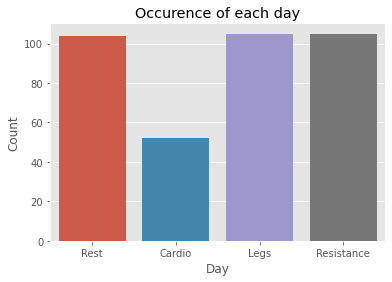

In [6]:
# Plot the occurence of each day
sns.countplot(df.Workout, order=["Rest", "Cardio", "Legs", "Resistance"])

# Add plot title and axes labels
plt.xlabel("Day"), plt.ylabel("Count"), plt.title("Occurence of each day"), 
plt.show()

#### 3.3 Calories burned

To simulate the calories burned during each workout, the client's weight is multiplied by the Metabolic Equivalent (MET) value, which returns an approximation of the number of calories burned during one hour of that particular activity.<SUP>7</SUP> METs are frequently used as a guide categorise cardiorespiratory fitness (CRF). However, Franklin et al. (2017) states that this is often overestimated.<SUP>8</SUP> This is echoed by Byrne et al. (2005), who states that resting energy expenditure is overestimated by 20%.<SUP>22</SUP>

![MET](met.png)

According to this method, the MET for each activity is listed below:

- Cardio (jogging, general) = 7.0 
- Legs (resistance (weight) training, squats, slow or explosive effort) = 5.0
- Chest/Delts/Arms (resistance (weight) training, multiple exercises, 8-15 repetitions at varied resistance) = 3.5

The code below calculates the calories burned by multiplying these values by the client's weight.

In [7]:
# Calculate the calories burned by multiplying the start weight by the MET value
cal_rest, cal_cardio, cal_legs, cal_resistance = weight_kg, weight_kg * 7.0, weight_kg * 5.0, weight_kg * 3.5

A function is then defined to extract a random value from a uniform distribution using the ```numpy.random.uniform()``` function depending on each workout. A *lambda* function is used to assign the generated values to their appropriate row in the data set.<SUP>9</SUP>

In [8]:
# Define a function to estimate the calories burned by each workout
def cals_burned(row):
    if row["Workout"] == "Rest": return 0
    if row["Workout"] == "Cardio": return int(np.random.uniform(cal_cardio/2, cal_cardio))
    if row["Workout"] == "Legs": return int(np.random.uniform(cal_legs/2, cal_legs))
    if row["Workout"] == "Resistance": return int(np.random.uniform(cal_resistance/2, cal_resistance))

# Create the Burned column
df["Burned"] = df.apply(lambda row: cals_burned(row), axis= 1)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned
0,2020-01-01,Wednesday,Legs,341
1,2020-01-02,Thursday,Resistance,204
2,2020-01-03,Friday,Rest,0
3,2020-01-04,Saturday,Cardio,374
4,2020-01-05,Sunday,Rest,0
5,2020-01-06,Monday,Legs,243
6,2020-01-07,Tuesday,Resistance,273
7,2020-01-08,Wednesday,Legs,324
8,2020-01-09,Thursday,Resistance,182
9,2020-01-10,Friday,Rest,0


To illustrate the uniform distribution, the plots below shows the burned calories distribution returned for each workout.

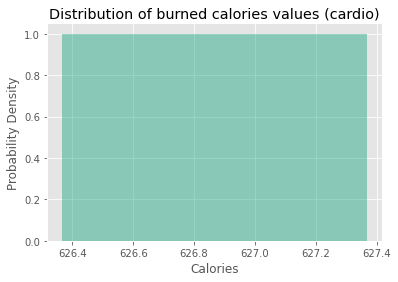

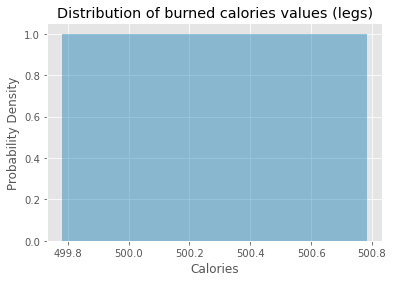

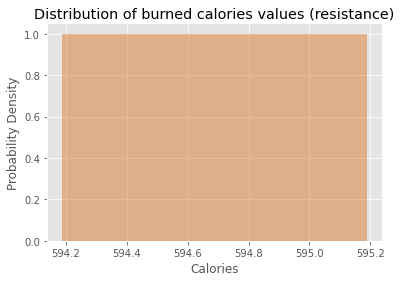

In [9]:
# Plot the distribution of burned calories during the cardio workout
sns.distplot(np.random.uniform(cal_cardio/2, cal_cardio), kde=False, color="#009E73")

# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of burned calories values (cardio)"), 
plt.show()

# Plot the distribution of burned calories during the legs workout
sns.distplot(np.random.uniform(cal_cardio/2, cal_cardio), kde=False, color="#0072B2")

# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of burned calories values (legs)"), 
plt.show()

# Plot the distribution of burned calories during the resistance workout
sns.distplot(np.random.uniform(cal_cardio/2, cal_cardio), kde=False, color="#D55E00")

# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of burned calories values (resistance)"), 
plt.show()

#### 3.4 Body Mass Index (BMI)

Body Mass Index (BMI) serves as a guidline to determine if a person is underweight, an optimal weight, overweight, or obese depending on their height and weight. The formula to determine BMI is kg/m<SUP>2</SUP> and the result categorises a person as per the diagram below.<SUP>10</SUP> However, several studies have demonstrated that many individuals with excess body fat are not necessarily obese according to BMI since one is not able to distinguish, by its means, between fat mass and fat-free mass. It has however become widely accepted due to its simplicity and association with cardiovascular events.<SUP>23</SUP> <SUP>24</SUP> The subsequent code calculates this client's BMI, which is 27.78 in this case, using their weight and height as parameters. This places the client in the "Overweight" category. 

![BMI](bmi.png)

In [10]:
# Define function to calculate BMI
def bmi(weight, height):
    bmi = weight/(height/100)**2
    return bmi

# Calculate the client's BMI using their height and weight
starting_bmi = bmi(weight_kg, height_m)

# Print the BMI
print("BMI: ", round(starting_bmi, 2))

BMI:  27.78


#### 3.5 Total Daily Energy Expenditure (TDEE)

Total Daily Energy Expenditure (TDEE) is a person's estimated energy expenditure when daily activity is taken into account, and is a combination of resting metabolic rate (RMR), thermic effect of food and physical activity.<SUP>11</SUP> It represents the amount of calories a person should consume to maintain their current weight. Therefore, the client should consume less than this value to lose weight.

![TDEE](tdee.png)

The Basal Metabolic Rate (BMR) is a person's estimated energy expenditure over the course of a day when they are at rest. It is determined by the person's weight, height, age, and sex. The code below calculates this client's BMR using the Harris-Benedict equation, which is needed to determine the TDEE.<SUP>12</SUP>

In [11]:
# Define the variables to determined BMR
age, male, female = 35, 5, -161

# Define a function to calculate BMR
def bmr(weight, height, age, sex):
    bmr = 10 * weight + 6.25 * height - 5 * age + sex
    return bmr

# Calculate the starting BMR
starting_bmr = bmr(weight_kg, height_m, age, male)

# Print the BMR
print("BMR: ", round(starting_bmr))

BMR:  1855


This value is then used below to calculate the TDEE. This particular client considers themselves to be sedentary with little or no exercise. Therefore, the BMR is multiplied by 1.2 (see table above). The *TDEE* column is created and the first row is populated.

In [12]:
# Define a function to calculate TDEE
def tdee(weight, height):
    tdee = bmr(weight, height, age, male) * 1.2
    return tdee
         
# Calculate and print the starting TDEE
starting_tdee = tdee(weight_kg, height_m)
print("TDEE: ", starting_tdee)

# Create the TDEE column and populate the first row
df["TDEE"] = np.nan
df.loc[0, "TDEE"] = starting_tdee

# Print the first 10 rows of the DataFrame
df.head(n=10)

TDEE:  2226.0


,Date,Day,Workout,Burned,TDEE
0,2020-01-01,Wednesday,Legs,341,2226.0
1,2020-01-02,Thursday,Resistance,204,NaN
2,2020-01-03,Friday,Rest,0,NaN
3,2020-01-04,Saturday,Cardio,374,NaN
4,2020-01-05,Sunday,Rest,0,NaN
5,2020-01-06,Monday,Legs,243,NaN
6,2020-01-07,Tuesday,Resistance,273,NaN
7,2020-01-08,Wednesday,Legs,324,NaN
8,2020-01-09,Thursday,Resistance,182,NaN
9,2020-01-10,Friday,Rest,0,NaN


#### 3.6 Define weight targets

As all the preliminary measurments have now been calculated and added to the data set, the weight targets can now be defined. Before beginning the training programme, it was agreed that the total target weight loss would be between 15kg and 20kg in order to bring the client's BMI into the "Normal" category gradually over the course of the year. Albeit an over-simplification, it is estimated that 3500 calories need to be burned to lose 0.454kg of fat.<SUP>13</SUP> The code below calculates the target and estimated weekly weight loss as well as the daily calorie deficit and allowance.

In [13]:
# Set the target weight loss
target_total = 15
target_weekly = target_total/52

# Estimate number of kilograms per calorie based on 3500cal = 0.454kg
kg_per_cal = 0.454/3500 

# Define a function to convert calories to kilograms 
def cal_to_kg(calories):
    kg = calories * kg_per_cal
    return kg

# Set the weekly and daily calorie deficits
cal_deficit_weekly = 2000
cal_deficit_daily = cal_deficit_weekly/7

print("Weekly target (kg):", round(target_weekly, 2))
print("Estimated weekly loss (kg):", round(cal_to_kg(cal_deficit_weekly), 2))
print("Daily calorie deficit:", round(cal_deficit_daily))
print("Daily calorie allowance:", round(starting_tdee - cal_deficit_daily))

Weekly target (kg): 0.29
Estimated weekly loss (kg): 0.26
Daily calorie deficit: 286
Daily calorie allowance: 1940


#### 3.7 Calorie intake

With 1940 calories as the daily average and allowing for a 10% variance, a truncated normal distribution using the ```scipy.stats.truncnorm()``` function would be suitable in this case, as it allows for upper and lower limits to be specified.<SUP>14</SUP> <SUP>15</SUP> <SUP>25</SUP> When defining the function to calculate calorie intake, the lowest value is set to 1500 calories, as it is advised that men should not consume less than this amount per day.<SUP>16</SUP> The highest value is set to the TDEE, as the client should eat less than that if he is to achieve his goals.

In [14]:
# Define a function to calculate the calorie intake
def cal_intake():
    # Set the low, high, average and standard deviation values
    low, high, average, std_dev = 1500, 2226, 1940, 194
    # Generate 365 random numbers within the specified range
    x = stats.truncnorm((low - average) / std_dev, (high - average) / std_dev, loc=average, scale=std_dev)
    cal_val = x.rvs(366).astype(int)
    return cal_val

# Call the function and store the output in a variable
cal_intake = cal_intake()

# Print the results
print(cal_intake)

[1996 1913 1833 1856 2056 1758 1728 1781 2002 1866 1777 1846 1675 1897
 2074 1901 1901 1593 1819 1668 1630 2106 2024 2085 1724 1863 2141 1895
 2150 2182 1532 1895 1962 1855 1868 1859 1792 1589 2032 2224 1614 2103
 1945 1573 1660 1937 1699 1828 1817 2191 1912 1823 2161 2187 2026 1728
 2124 1899 2060 2027 1994 2050 2075 1908 1918 1692 1866 2121 1786 2041
 2072 1771 2049 1996 2196 1874 2045 2094 1870 1788 1865 1994 1807 2103
 1828 2049 1841 1927 2113 1919 1981 1852 1911 1650 1934 1902 1830 1755
 1851 1828 1862 2073 2128 2142 1890 2130 1964 2221 1717 2045 1965 1932
 2046 2087 2086 1853 1871 1968 1622 2076 1964 1900 1987 2176 2070 1996
 1778 2192 1874 2135 1926 2003 2122 1646 1828 1758 1628 1852 2142 1805
 1707 2164 1922 1913 2011 2078 1790 1774 1891 2096 2152 1767 2011 1901
 2116 1828 1815 1580 2111 1750 1819 1801 2148 1675 1849 2007 1749 1960
 1891 1555 1973 1854 1780 2196 2091 1902 1841 1558 2030 1812 1930 1982
 2043 1744 1686 2054 1636 1883 1610 1778 1766 2091 2038 1800 1964 1923
 1686 

The plot below illustrates the typical bell-shaped normal distribution of these values, with the majority close to the mean (indicated by a vertical red line).

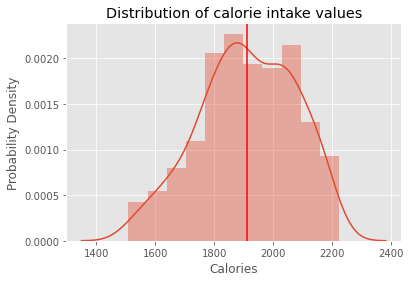

In [15]:
# Plot the distribution of calorie intake values
sns.distplot(cal_intake)

# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of calorie intake values")

# Draw red line to show the mean value
plt.axvline(np.mean(cal_intake), color="red")
plt.show()

In this workout programme, it is advised that less calories are consumed on rest/cardio days (between 200 and 300 calories less than training days). In the code below, a uniform distribution is created and the ```numpy.where()``` function is applied, which returns elements depending on a condition.<SUP>17</SUP> In this case, it subtracts the randomly generated variable where the cell in the *Workout* column is either "Rest" or "Cardio".

In [16]:
# Create a variable with calorie a
less_cals = np.random.uniform(200, 300)
df["Input"] = np.where((((df["Workout"])=="Rest") | ((df["Workout"])=="Cardio")), cal_intake - int(less_cals), cal_intake)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input
0,2020-01-01,Wednesday,Legs,341,2226.0,1996
1,2020-01-02,Thursday,Resistance,204,NaN,1913
2,2020-01-03,Friday,Rest,0,NaN,1596
3,2020-01-04,Saturday,Cardio,374,NaN,1619
4,2020-01-05,Sunday,Rest,0,NaN,1819
5,2020-01-06,Monday,Legs,243,NaN,1758
6,2020-01-07,Tuesday,Resistance,273,NaN,1728
7,2020-01-08,Wednesday,Legs,324,NaN,1781
8,2020-01-09,Thursday,Resistance,182,NaN,2002
9,2020-01-10,Friday,Rest,0,NaN,1629


The plot below shows the uniform distribution used in reducing the calorie intake on weekends.

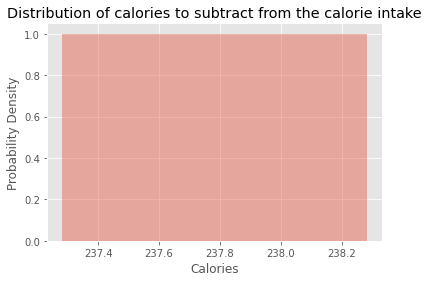

In [17]:
# Plot the distribution of calorie intake values
sns.distplot(less_cals, kde=False)

# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of calories to subtract from the calorie intake"), 
plt.show()

#### 3.8 Calorie output

The calorie output is calculated by adding the *TDEE* and *Burned* columns. Only the first row is populated at this point.

In [18]:
# Create the Cals Out column and populate the first row
df["Output"] = np.nan
df.loc[0, "Output"] = df.loc[0, "TDEE"] + df.loc[0, "Burned"]

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output
0,2020-01-01,Wednesday,Legs,341,2226.0,1996,2567.0
1,2020-01-02,Thursday,Resistance,204,NaN,1913,NaN
2,2020-01-03,Friday,Rest,0,NaN,1596,NaN
3,2020-01-04,Saturday,Cardio,374,NaN,1619,NaN
4,2020-01-05,Sunday,Rest,0,NaN,1819,NaN
5,2020-01-06,Monday,Legs,243,NaN,1758,NaN
6,2020-01-07,Tuesday,Resistance,273,NaN,1728,NaN
7,2020-01-08,Wednesday,Legs,324,NaN,1781,NaN
8,2020-01-09,Thursday,Resistance,182,NaN,2002,NaN
9,2020-01-10,Friday,Rest,0,NaN,1629,NaN


#### 3.9 Weight

The next column to be created is one which simply shows the difference between calorie intake and output. If the value is negative, then the client has achieved a calorie deficit for that day. Otherwise, more calories were consumed than burned.

In [19]:
# Create the Difference column
df["Difference"] = np.nan
df.loc[0, "Difference"] = df.loc[0, "Input"] - df.loc[0, "Output"]

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference
0,2020-01-01,Wednesday,Legs,341,2226.0,1996,2567.0,-571.0
1,2020-01-02,Thursday,Resistance,204,NaN,1913,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1596,NaN,NaN
3,2020-01-04,Saturday,Cardio,374,NaN,1619,NaN,NaN
4,2020-01-05,Sunday,Rest,0,NaN,1819,NaN,NaN
5,2020-01-06,Monday,Legs,243,NaN,1758,NaN,NaN
6,2020-01-07,Tuesday,Resistance,273,NaN,1728,NaN,NaN
7,2020-01-08,Wednesday,Legs,324,NaN,1781,NaN,NaN
8,2020-01-09,Thursday,Resistance,182,NaN,2002,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1629,NaN,NaN


To simulate normal weight variations, both the ```numpy.random.normal()``` and ```numpy.random.choice()``` functions are used to introduce noise to the values. Considering that the client's weekly weight loss goal of 0.29kg, the daily weight loss would therefore be 0.04kg. This is used as the mean value when generating the normal distribution, and a 0.01 standard deviation is applied.  

In [20]:
# Create a normal distribution
weight_1 = np.random.normal(0.04, 0.01)
weight_2 = np.random.choice((-1, 1))

# Create the Loss column
df["Loss"] = np.nan
df.loc[0, "Loss"] = round(cal_to_kg(df.loc[0, "Difference"]) + (weight_1 * weight_2), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss
0,2020-01-01,Wednesday,Legs,341,2226.0,1996,2567.0,-571.0,-0.04
1,2020-01-02,Thursday,Resistance,204,NaN,1913,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1596,NaN,NaN,NaN
3,2020-01-04,Saturday,Cardio,374,NaN,1619,NaN,NaN,NaN
4,2020-01-05,Sunday,Rest,0,NaN,1819,NaN,NaN,NaN
5,2020-01-06,Monday,Legs,243,NaN,1758,NaN,NaN,NaN
6,2020-01-07,Tuesday,Resistance,273,NaN,1728,NaN,NaN,NaN
7,2020-01-08,Wednesday,Legs,324,NaN,1781,NaN,NaN,NaN
8,2020-01-09,Thursday,Resistance,182,NaN,2002,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1629,NaN,NaN,NaN


The *Weight* column is populated by adding the client's starting weight to the *Loss* column, as shown below.

In [21]:
# Creating the weight column.
df["Weight"] = np.nan
df.loc[0, "Weight"] = round(weight_kg + df.loc[0, "Loss"], 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight
0,2020-01-01,Wednesday,Legs,341,2226.0,1996,2567.0,-571.0,-0.04,89.96
1,2020-01-02,Thursday,Resistance,204,NaN,1913,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1596,NaN,NaN,NaN,NaN
3,2020-01-04,Saturday,Cardio,374,NaN,1619,NaN,NaN,NaN,NaN
4,2020-01-05,Sunday,Rest,0,NaN,1819,NaN,NaN,NaN,NaN
5,2020-01-06,Monday,Legs,243,NaN,1758,NaN,NaN,NaN,NaN
6,2020-01-07,Tuesday,Resistance,273,NaN,1728,NaN,NaN,NaN,NaN
7,2020-01-08,Wednesday,Legs,324,NaN,1781,NaN,NaN,NaN,NaN
8,2020-01-09,Thursday,Resistance,182,NaN,2002,NaN,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1629,NaN,NaN,NaN,NaN


#### 3.10 Add Body Mass Index (BMI) to the data set

The client's BMI is calculated using the defined BMI function based on the height value of 180m and varying weight value. 

In [22]:
# Create the BMI column
df["BMI"] = np.nan
df.loc[0, "BMI"] = round(bmi(df.loc[0, "Weight"], height_m), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI
0,2020-01-01,Wednesday,Legs,341,2226.0,1996,2567.0,-571.0,-0.04,89.96,27.77
1,2020-01-02,Thursday,Resistance,204,NaN,1913,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1596,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,Saturday,Cardio,374,NaN,1619,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,Sunday,Rest,0,NaN,1819,NaN,NaN,NaN,NaN,NaN
5,2020-01-06,Monday,Legs,243,NaN,1758,NaN,NaN,NaN,NaN,NaN
6,2020-01-07,Tuesday,Resistance,273,NaN,1728,NaN,NaN,NaN,NaN,NaN
7,2020-01-08,Wednesday,Legs,324,NaN,1781,NaN,NaN,NaN,NaN,NaN
8,2020-01-09,Thursday,Resistance,182,NaN,2002,NaN,NaN,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1629,NaN,NaN,NaN,NaN,NaN


#### 3.11 Resting Heart Rate (RHR)

A normal resting heart rate range is between 60 and 100 beats per minute (bpm).<SUP>26</SUP> A person's normal resting heart rate is fairly consistent over time, but may vary from others' by up to 70 bpm, according to analysis of the largest dataset of daily resting heart rate ever collected.<SUP>27</SUP> <SUP>28</SUP> However, in this instance it is assumed that the client's heart rate remains consistent with only minor variation.

![RHR](rhr.png)

In this study it was observed that the mean RHR for all individuals over all available monitored days was 65.5bpm with variation of 7.7 bpm. The client's average RHR before starting the programme was 80 bpm and it was agreed that the goal was to bring this down to approximately 60 bpm. The ```numpy.random.linspace()``` function, which returns evenly spaced samples over the interval, is used to simulated this. The ```numpy.random.random()``` function is then used to add noise with a standard deviation of 7.7.<SUP>30</SUP>

In [23]:
# Create a distribution to simulate RHR
rhr = np.round(np.linspace(80, 60, 366), 2) + np.round(np.random.normal(0, 7.7, 366), 2)
# Print the results
print(rhr)

[81.17 78.15 78.85 82.   65.95 84.23 80.82 73.89 72.95 86.58 61.97 71.72
 82.83 70.87 72.87 71.22 79.8  66.66 72.74 78.3  75.28 77.84 74.98 78.87
 76.6  72.82 75.35 90.23 71.19 67.29 79.87 84.28 84.75 75.28 87.52 69.63
 66.79 76.36 72.13 86.68 80.01 90.94 71.39 82.3  75.39 76.41 77.09 72.69
 81.04 77.84 79.51 72.92 80.59 85.33 78.51 79.3  73.61 73.49 76.14 85.64
 77.55 65.72 80.91 62.99 75.72 79.69 76.09 83.52 78.07 77.45 74.23 82.23
 75.51 65.69 75.97 72.12 71.45 76.79 71.83 70.65 69.08 69.68 66.76 70.15
 81.28 70.68 70.89 69.59 89.16 80.95 83.92 87.67 77.23 62.59 70.44 66.49
 75.79 72.52 84.95 71.1  85.32 68.98 81.53 64.15 72.87 85.61 84.19 74.59
 72.48 86.72 72.93 69.26 70.7  82.55 72.52 64.41 62.36 88.57 81.28 76.93
 67.43 62.4  63.65 74.52 60.98 73.22 67.23 67.74 78.2  71.57 64.43 84.71
 66.85 68.04 87.44 83.6  67.   66.43 71.38 70.46 68.97 62.14 74.57 71.88
 78.18 77.38 75.9  69.69 72.7  70.9  71.34 72.63 68.43 71.8  76.34 76.7
 65.83 67.18 65.21 77.08 63.58 76.27 62.9  69.95 76.

The plot below illustrates the normal distribution of the client's RHR.

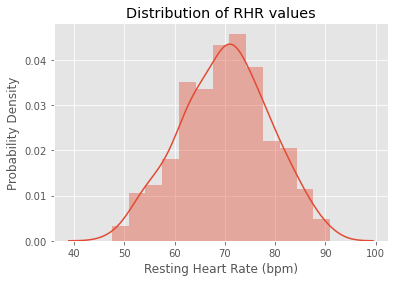

In [24]:
# Plot the distribution of RHR values
sns.distplot(rhr)
# Add plot title and axes labels
plt.xlabel("Resting Heart Rate (bpm)"), plt.ylabel("Probability Density"), plt.title("Distribution of RHR values"), 
plt.show()

The code below creates the *RHR* column using this data.

In [25]:
# Create the "RHR" column in the data set
df["RHR"] = rhr

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR
0,2020-01-01,Wednesday,Legs,341,2226.0,1996,2567.0,-571.0,-0.04,89.96,27.77,81.17
1,2020-01-02,Thursday,Resistance,204,NaN,1913,NaN,NaN,NaN,NaN,NaN,78.15
2,2020-01-03,Friday,Rest,0,NaN,1596,NaN,NaN,NaN,NaN,NaN,78.85
3,2020-01-04,Saturday,Cardio,374,NaN,1619,NaN,NaN,NaN,NaN,NaN,82.00
4,2020-01-05,Sunday,Rest,0,NaN,1819,NaN,NaN,NaN,NaN,NaN,65.95
5,2020-01-06,Monday,Legs,243,NaN,1758,NaN,NaN,NaN,NaN,NaN,84.23
6,2020-01-07,Tuesday,Resistance,273,NaN,1728,NaN,NaN,NaN,NaN,NaN,80.82
7,2020-01-08,Wednesday,Legs,324,NaN,1781,NaN,NaN,NaN,NaN,NaN,73.89
8,2020-01-09,Thursday,Resistance,182,NaN,2002,NaN,NaN,NaN,NaN,NaN,72.95
9,2020-01-10,Friday,Rest,0,NaN,1629,NaN,NaN,NaN,NaN,NaN,86.58


#### 3.12 Fasting Blood Glucose (FBG)

Numerous studies have measured changes in fasting blood glucose (FBG) levels in response to physical activity interventions. In a study by Norton, L., et al. (2012) it was found that following the daily exercise intervention, those participants with high baseline FBG values showed a decrease over time.<SUP>31</SUP> A FBG of 3.9 to 5.4 mmol/l would be considered normal. Anything above this would be considered prediabetes.<SUP>32</SUP> Similar to the RHR, this is simulated using a combination of the ```numpy.random.linspace()``` and ```numpy.random.random()``` functions. The client's average FBG before starting the programme was 5.8 mmol/l and it was agreed that the goal was to bring this down to approximately 5.0 mmol/l. A standard deviation of 0.1 is applied to add some variation.

In [26]:
# Create a distribution to simulate FBG
fbg = np.round(np.linspace(5.8, 5.0, 366), 2) + np.round(np.random.normal(0, 0.1, 366), 2)

# Print the results
print(fbg)

[5.86 5.86 5.84 5.52 5.77 5.81 5.89 5.86 5.72 5.66 5.82 5.7  5.8  5.89
 5.8  5.72 5.81 5.85 5.92 5.7  5.74 5.63 5.75 5.82 5.76 5.68 5.74 5.84
 5.69 5.92 5.63 5.67 5.5  5.69 5.8  5.88 5.76 5.6  5.74 5.54 5.64 5.94
 5.69 5.69 5.7  5.71 5.75 5.69 5.67 5.6  5.95 5.69 5.75 5.65 5.63 5.5
 5.66 5.7  5.65 5.59 5.66 5.5  5.82 5.68 5.77 5.79 5.61 5.64 5.74 5.52
 5.63 5.38 5.42 5.54 5.57 5.75 5.62 5.61 5.64 5.57 5.59 5.5  5.61 5.71
 5.64 5.55 5.44 5.59 5.56 5.45 5.58 5.5  5.67 5.43 5.72 5.55 5.62 5.59
 5.51 5.64 5.5  5.63 5.56 5.54 5.64 5.49 5.32 5.59 5.73 5.43 5.5  5.55
 5.61 5.63 5.53 5.37 5.59 5.63 5.65 5.64 5.34 5.48 5.69 5.39 5.39 5.46
 5.34 5.69 5.6  5.35 5.57 5.53 5.54 5.4  5.61 5.31 5.44 5.4  5.58 5.45
 5.34 5.44 5.65 5.55 5.55 5.59 5.53 5.51 5.33 5.33 5.5  5.55 5.47 5.35
 5.55 5.47 5.42 5.41 5.27 5.34 5.42 5.43 5.36 5.18 5.37 5.5  5.53 5.31
 5.3  5.43 5.49 5.37 5.59 5.31 5.31 5.49 5.39 5.44 5.62 5.32 5.33 5.36
 5.48 5.19 5.64 5.38 5.39 5.4  5.43 5.41 5.4  5.4  5.43 5.4  5.37 5.33
 5.23 5

The plot below illustrates the normal distribution of the client's FBG.

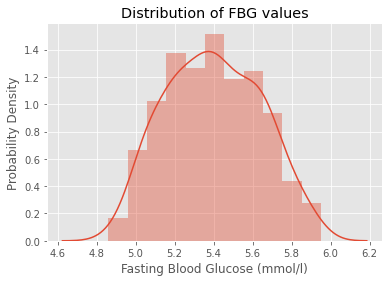

In [27]:
# Plot the distribution of RHR values
sns.distplot(fbg)
# Add plot title and axes labels
plt.xlabel("Fasting Blood Glucose (mmol/l)"), plt.ylabel("Probability Density"), plt.title('Distribution of FBG values'), 
plt.show()

The code below creates the *FBG* column using this data.

In [28]:
# Create the "FBG" column in the data set
df["FBG"] = fbg

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR,FBG
0,2020-01-01,Wednesday,Legs,341,2226.0,1996,2567.0,-571.0,-0.04,89.96,27.77,81.17,5.86
1,2020-01-02,Thursday,Resistance,204,NaN,1913,NaN,NaN,NaN,NaN,NaN,78.15,5.86
2,2020-01-03,Friday,Rest,0,NaN,1596,NaN,NaN,NaN,NaN,NaN,78.85,5.84
3,2020-01-04,Saturday,Cardio,374,NaN,1619,NaN,NaN,NaN,NaN,NaN,82.00,5.52
4,2020-01-05,Sunday,Rest,0,NaN,1819,NaN,NaN,NaN,NaN,NaN,65.95,5.77
5,2020-01-06,Monday,Legs,243,NaN,1758,NaN,NaN,NaN,NaN,NaN,84.23,5.81
6,2020-01-07,Tuesday,Resistance,273,NaN,1728,NaN,NaN,NaN,NaN,NaN,80.82,5.89
7,2020-01-08,Wednesday,Legs,324,NaN,1781,NaN,NaN,NaN,NaN,NaN,73.89,5.86
8,2020-01-09,Thursday,Resistance,182,NaN,2002,NaN,NaN,NaN,NaN,NaN,72.95,5.72
9,2020-01-10,Friday,Rest,0,NaN,1629,NaN,NaN,NaN,NaN,NaN,86.58,5.66


#### 3.13 Populating the data set

The code below populates the missing values and outputs the complete data set.

In [29]:
# Create a loop which starts from the second row in the data set
for i in range(1, len(df)):    
    # TDEE depends on the weight of the previous day
    df.loc[i, "TDEE"] = tdee(df.loc[i-1, "Weight"], height_m)    
    # Ouput is the addition of TDEE and burned calories
    df.loc[i, "Output"] = df.loc[i, "TDEE"] + df.loc[i, "Burned"]     
    # Difference is the subtraction of the calorie output from the input
    df.loc[i, "Difference"] = round(df.loc[i, "Input"] - df.loc[i, "Output"], 2)    
    # Loss is the conversion of the calorie output to weight plus a random variant
    df.loc[i, "Loss"] = round(cal_to_kg(df.loc[i, "Difference"]) + (np.random.choice((-1, 1)) * np.random.normal(0.04, 0.01)), 2)    
    # Weight is the subtraction of the loss from the previous day's weight
    df.loc[i, "Weight"] = round(df.loc[i-1, "Weight"] + df.loc[i, "Loss"], 2) 
    # BMI is the conversion of weight to a BMI score
    df.loc[i, "BMI"] = round(bmi(df.loc[i, "Weight"], height_m), 2)
    
# Print the complete data set
df

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR,FBG
0,2020-01-01,Wednesday,Legs,341,2226.00,1996,2567.00,-571.00,-0.04,89.96,27.77,81.17,5.86
1,2020-01-02,Thursday,Resistance,204,2225.52,1913,2429.52,-516.52,-0.11,89.85,27.73,78.15,5.86
2,2020-01-03,Friday,Rest,0,2224.20,1596,2224.20,-628.20,-0.04,89.81,27.72,78.85,5.84
3,2020-01-04,Saturday,Cardio,374,2223.72,1619,2597.72,-978.72,-0.07,89.74,27.70,82.00,5.52
4,2020-01-05,Sunday,Rest,0,2222.88,1819,2222.88,-403.88,-0.02,89.72,27.69,65.95,5.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,Sunday,Rest,0,1949.88,1769,1949.88,-180.88,-0.06,66.93,20.66,53.97,5.19
362,2020-12-28,Monday,Legs,283,1949.16,1844,2232.16,-388.16,-0.09,66.84,20.63,71.71,5.13
363,2020-12-29,Tuesday,Resistance,203,1948.08,1929,2151.08,-222.08,0.01,66.85,20.63,72.66,5.16
364,2020-12-30,Wednesday,Legs,320,1948.20,1825,2268.20,-443.20,-0.01,66.84,20.63,60.79,4.99


### 4. Analysis

The two plots below illustrate the steady weight loss progress of the client over the year-long programme as well as the daily fluctuations. 

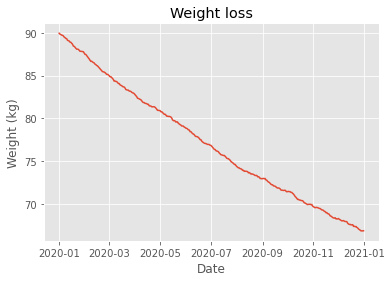

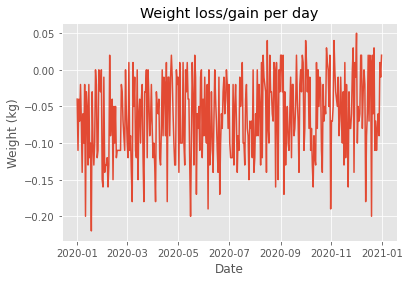

In [30]:
# Create a line plot of the Weight column over the year
sns.lineplot(x ="Date", y ="Weight", data=df)
# Add plot title and axes labels
plt.xlabel("Date"), plt.ylabel("Weight (kg)"), plt.title("Weight loss")
plt.show()

# Create a line plot of the Loss column over the year
sns.lineplot(x ="Date", y ="Loss", data=df)
# Add plot title and axes labels
plt.xlabel("Date"), plt.ylabel("Weight (kg)"), plt.title("Weight loss/gain per day")
plt.show()

The plot below illustrate's the client's RHR over the course of the year. Although there appears to be a lot of variation, it seems to have a downward trend overall.

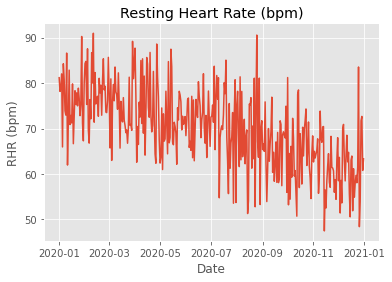

In [31]:
# Create a line plot of the RHR column over the year
sns.lineplot(x ="Date", y ="RHR", data=df)
# Add plot title and axes labels
plt.xlabel("Date"), plt.ylabel("RHR (bpm)"), plt.title("Resting Heart Rate (bpm)")
plt.show()

The plot below illustrates the client's FBG over the course of the year. It is similar to the FBG in that although there is a lot of variation, it has a downward trend.

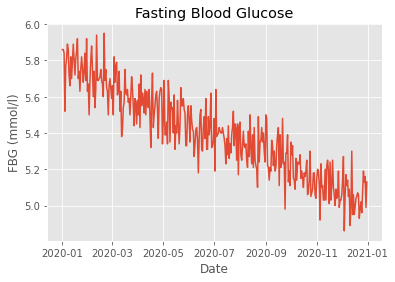

In [32]:
# Create a line plot of the FBG column over the year
sns.lineplot(x ="Date", y ="FBG", data=df)
# Add plot title and axes labels
plt.xlabel("Date"), plt.ylabel("FBG (mmol/l)"), plt.title("Fasting Blood Glucose")
plt.show()

As shown below, the client's BMI has now fallen into the "Normal" BMI category. This trend is also reflected in the TDEE.

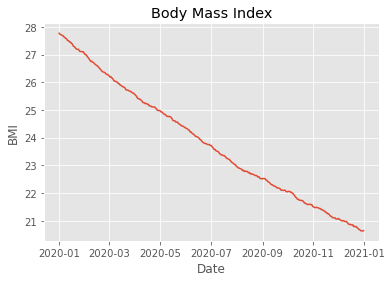

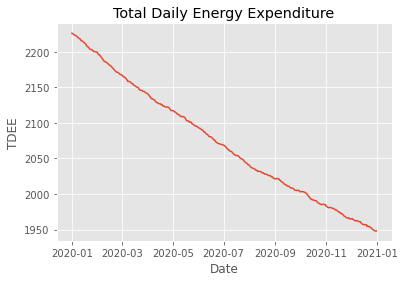

In [33]:
# Create a line plot of the BMI column over the year
sns.lineplot(x ="Date", y ="BMI", data=df)
# Add plot title and axes labels
plt.xlabel("Date"), plt.ylabel("BMI"), plt.title("Body Mass Index")
plt.show()

# Create a line plot of the TDEE column over the year
sns.lineplot(x ="Date", y ="TDEE", data=df)
# Add plot title and axes labels
plt.xlabel("Date"), plt.ylabel("TDEE"), plt.title("Total Daily Energy Expenditure")
plt.show()

The plot below is a combination of a categorical scatterplot and categorical distribution plot.<SUP>33</SUP> It not only shows how more calories are burned on cardio days in general, but also how the range of calories burned varies considerably when compared to resistance training.

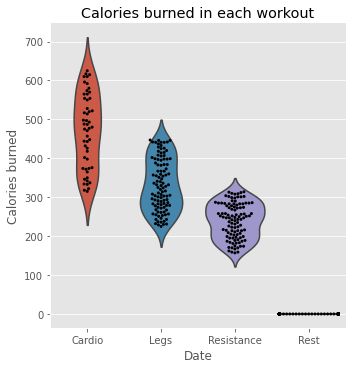

In [34]:
# Create a categorical scatterplot of the Burned column
sns.catplot(x ="Workout", y ="Burned", kind="violin", inner=None, data=df)
# Create a categorical distribution plot of the Burned column
sns.swarmplot(x ="Workout", y ="Burned", color="k", size=3, data=df)
# Add plot title and axes labels
plt.xlabel("Date"), plt.ylabel("Calories burned"), plt.title("Calories burned in each workout")
plt.show()

### 5. Conclusion

This is a successful simulation of weight loss progress during a fitness programme, albeit with some limitations. Although the ```numpy.random``` package was used to introduce randomisation and variability, the model assumes that the client has not gone off course at any point during the year. It also does not take into account any underlying illnesses or disabilities the client may have. Despite the use of many different variables, several extra layers of complexity could be added to generate a more comprehensive simulation.

### 6. References

1. TechTarget, *synthetic data* [online] Available at: https://searchcio.techtarget.com/definition/synthetic-data

2. w3resource, *Pandas: Data Manipulation - date_range() function* [online] Available at: https://www.w3resource.com/pandas/date_range.php

3. Pandas, *pandas.Series.dt.day* [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html

4. Stack Overflow, *When to use Category rather than Object?* [online] Available at: https://stackoverflow.com/questions/30601830/when-to-use-category-rather-than-object

5. Pandas, *Categorical data* [online] Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html 

6. w3resource. *Pandas DataFrame: head() function* [online] Available at: https://www.w3resource.com/pandas/dataframe/dataframe-head.php

7. Compendium of Physical Activities, *Activity Categories* [online] Available at: https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories

8. Franklin, B.A. et al., 2017. "Using Metabolic Equivalents in Clinical Practice", *The American Journal of Cardiology*, 121, pp. 382-387. Available from: Science Direct [accessed 08 December 2020]

9. Stack Overflow, *pandas create new column based on values from other columns / apply a function of multiple columns, row-wise* [online] Available at: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o/26887820#26887820

10. Wikipedia, *Body mass index* [online] Available at: https://en.wikipedia.org/wiki/Body_mass_index

11. Grigolon, R.B., et al., 2020. "Caloric restriction, resting metabolic rate and cognitive performance in Nonobese adults: A post-hoc analysis from CALERIE study", *Journal of Psychiatric Research*, 128 (2020), pp. 16-22. Available from: Science Direct [accessed 08 December 2020]

12. Wikipedia, *Harris-Benedict equation* [online] Available at: https://en.wikipedia.org/wiki/Harris%E2%80%93Benedict_equation

13. Mayo Clinic, *Counting calories: Get back to weight-loss basics* [online] Available at: https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/calories/art-20048065 

14. Wikipedia, *Truncated normal distribution* [online] Available at: https://en.wikipedia.org/wiki/Truncated_normal_distribution

15. SciPy, *scipy.stats.truncnorm*, [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html

16. Harvard Health Publishing, *Calorie counting made easy* [online] Available at: https://www.health.harvard.edu/staying-healthy/calorie-counting-made-easy

17. Numpy, *numpy.where* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.where.html

18. Seaborn, *seaborn.countplot* [online] Available at: https://seaborn.pydata.org/generated/seaborn.countplot.html

19. Towards Data Science, *Combining Actual Data with Simulated Data in Machine Learning* [online] Available at: https://towardsdatascience.com/combining-actual-data-with-simulated-data-in-machine-learning-fa07a68b9640

20. DataCamp, *Random Number Generator Using Numpy* [online] Available at: https://www.datacamp.com/community/tutorials/numpy-random

21. NumPy, *numpy.random.choice* [online] Available at: numpyhttps://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html

22. Byrne, N.M., et al., 2005. "Metabolic equivalent: one size does not fit all", *Journal of Applied Physiology*, 99, pp. 1112-1119.

23. Active, *What is BMI and How to Calculate It* [online] Available at: https://www.active.com/fitness/articles/what-is-bmi-and-how-to-calculate-it

24.  de Oliveira, B.R., et al., 2020. "Diagnostic performance of body mass index in detection of obesity using different cutoff points for excess body fat", *Nutrition*, 79-80 (2020).

25. Stack Overflow, *How to specify upper and lower limits when using numpy.random.normal* [online] Available at: https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal

26. British Health Foundation, *Your heart rate* [online] Available at: https://www.bhf.org.uk/informationsupport/how-a-healthy-heart-works/your-heart-rate

27. News Medical Life Sciences, *Analysis shows variability in daily resting heart rate between individuals* [online] Availabile at: https://www.news-medical.net/news/20200206/Analysis-shows-variability-in-daily-resting-heart-rate-between-individuals.aspx

28. Quer, G., et al., 2020. "Inter- and intraindividual variability in daily resting heart rate and its associations with age, sex, sleep, BMI, and time of year: Retrospective, longitudinal cohort study of 92,457 adults", *PLOS ONE*, 15 (2).

29. NumPy, *numpy.linspace* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

30. Stack Overflow, *adding noise to a signal in python* [online] Available at: https://stackoverflow.com/questions/14058340/adding-noise-to-a-signal-in-python

31. Norton, L., et al., 2012. "Exercise training improves fasting glucose control", *Open Access Journal of Sports Medicine*, 3, pp. 209-214.

32. Diabetes.co.uk, *Fasting Blood Sugar Levels* [online] Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3781916/#

33. Seaborn, *seaborn.catplot* [online] Available at: https://seaborn.pydata.org/generated/seaborn.catplot.html